In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

**Load MNIST dataset, print shape & displaying some images**

Training Data Shape: (60000, 28, 28), Testing Data Shape: (10000, 28, 28)


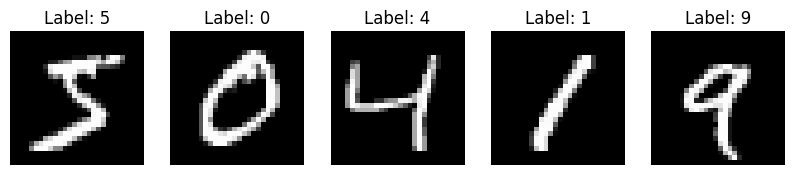

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training Data Shape: {x_train.shape}, Testing Data Shape: {x_test.shape}")


plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_train[i]}")
plt.show()


*  Normalization of pixel values
*  Reshaping of images
*  Convertion of labels to categorical


In [11]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



*   **CNN model**
*   **Model summary**



In [12]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # Output layer (10 classes)
])


model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

**Training of model**

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9133 - loss: 0.2864 - val_accuracy: 0.9770 - val_loss: 0.0684
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9834 - loss: 0.0514 - val_accuracy: 0.9842 - val_loss: 0.0491
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.9859 - val_loss: 0.0400
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9943 - loss: 0.0190 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9853 - val_loss: 0.0527


**Evaluation of model**

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9846 - loss: 0.0521
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


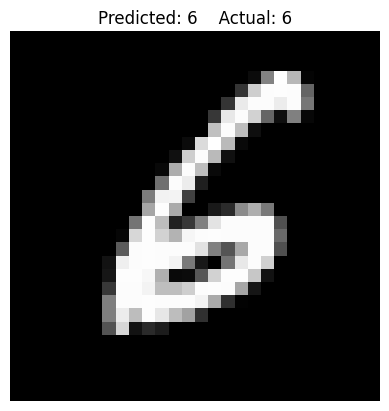

In [7]:
import random

# Pick a random test image
index = random.randint(0, len(x_test))
img = x_test[index]

# Predict the digit
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)
actual_label = np.argmax(y_test[index])

# Show the image and prediction
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_label}    Actual: {actual_label}")
plt.axis("off")
plt.show()
